> 由于本人的懒惰，本demo不会有太多的关于为什么要这样做的文字说明，必要的步骤说明会在代码中以注释的形式出现。另外，为了让同学们自行尝试和思考，本demo只会给出最基本的示例，数据分析和可视化部分只有最基本的演示，请同学们**自行扩展并尝试更多的思路**。最后需要提示一点，本demo是为了演示流程，因此所有的代码都放在同一个notebook中。在实践中，请同学们**合理拆分代码文件，并通过git进行版本管理**。因此建议在本地进行python的编写，在kaggle中只进行最终结果的提交。

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 读取数据
train_df = pd.read_csv("/kaggle/input/beginner-competition-for-uestc-dm-lab-2023/recipes_train.csv")
test_df = pd.read_csv("/kaggle/input/beginner-competition-for-uestc-dm-lab-2023/recipes_test.csv")

## 1. 数据分析与可视化

In [3]:
# 查看数据形状
train_df.shape

(1469, 385)

In [4]:
# 展示前五行数据
train_df.head(5)

,id,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,1,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,korean,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.describe()

,id,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,1469.000000,1469.000000,1469.0,1469.000000,1469.000000,1469.000000,1469.0,1469.000000,1469.0,1469.000000,...,1469.0,1469.000000,1469.000000,1469.000000,1469.000000,1469.0,1469.000000,1469.000000,1469.000000,1469.000000
mean,735.000000,0.019061,0.0,0.000681,0.002723,0.016338,0.0,0.006127,0.0,0.002042,...,0.0,0.001361,0.019741,0.005446,0.055820,0.0,0.002723,0.010892,0.055820,0.006807
std,424.208086,0.136785,0.0,0.026091,0.052128,0.126814,0.0,0.078059,0.0,0.045160,...,0.0,0.036886,0.139157,0.073620,0.229653,0.0,0.052128,0.103829,0.229653,0.082253
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,368.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,735.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1102.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1469.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


从上述数据描述中可以看出，在该数据集中，1表示该菜谱使用了对应食材，0表示该菜谱未使用对应食材。因此我们可以画一些图对食材的使用情况进行统计和展示

In [6]:
# 按照食谱产地进行分组统计
food_count = {}
for _,group in train_df.groupby("cuisine"):
    location = group["cuisine"].head(1).item()
    food_count[location] = {}
    for col in group.columns:
        if col not in ["id", "cuisine"]:
            food_count[location][col] = group[col].sum()
food_count.keys()

dict_keys(['chinese', 'indian', 'japanese', 'korean', 'thai'])

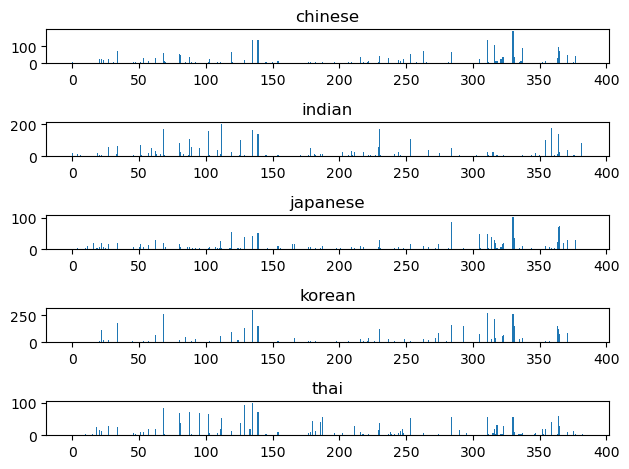

In [7]:
# 绘制统计结果

import matplotlib.pyplot as plt

plt.figure()

subplot_count = len(food_count.keys())

for i in range(subplot_count):
    location = list(food_count.keys())[i]
    plt.subplot(subplot_count, 1, i+1)
    plt.bar(range(len(food_count[location].keys())), food_count[location].values())
    plt.title(location)

# 避免标题和子图重叠
plt.tight_layout()
# 绘制
plt.show()

从上图可以看出，各个国家的食谱中食物的频率分布是有较大不同的，某些食材在不同国家的食谱中的使用情况差异非常大，因此可以在此基础上扩展出。。。。。。。

## 2.模型训练与预测

In [8]:
# 拆分训练数据
train_x = train_df.drop(columns=["cuisine"]).values
train_y = train_df["cuisine"].values

# 分割训练集验证集
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# 使用lr模型
model = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")

# 训练模型
model.fit(X_train, y_train)
print("train accuracy:", accuracy_score(model.predict(X_train), y_train))
print("valid accuracy:", accuracy_score(model.predict(X_valid), y_valid))

train accuracy: 0.8246808510638298
valid accuracy: 0.7857142857142857


In [9]:
# 模型预测
result = model.predict(test_df.values)

# 导出结果
output_df = pd.DataFrame()
output_df["id"] = test_df["id"]
output_df["cuisine"] = result

# 导出文件名需要为submission.csv，格式参考evaluation中的说明
output_df.to_csv("/kaggle/working/submission.csv", index=False)

## 3. 结果提交

在运行完上面的代码后，也就是执行完结果文件导出后。
1.首先，点击右侧的Data，进入数据目录确认自己的output中能正常生成submission.csv

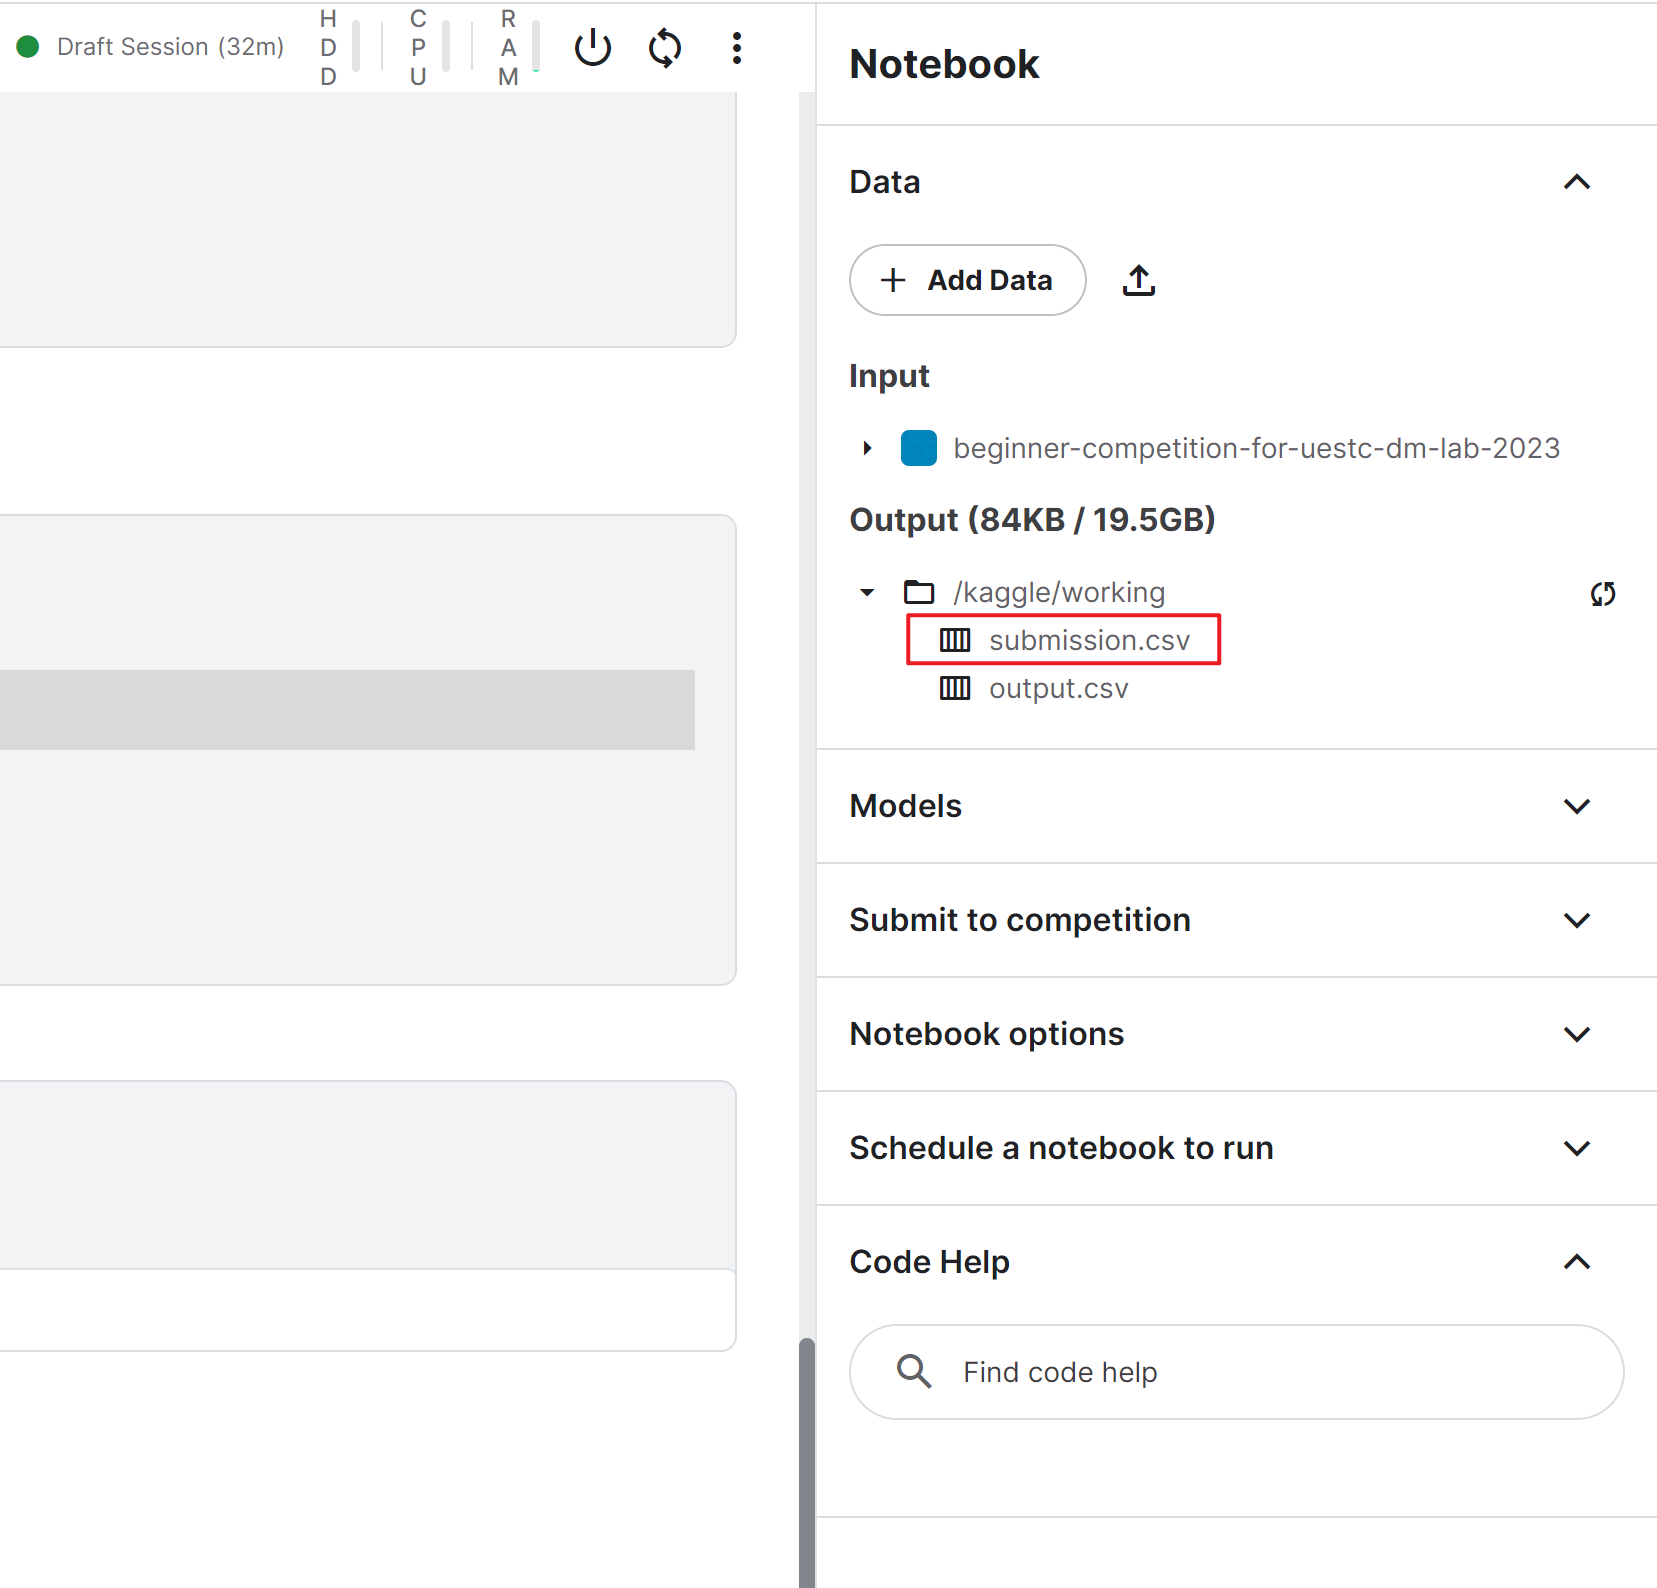

2.点击右上角的Save Version保存当前的notebook

3.点击下面的Submit to competition中的submit，选择刚保存的版本进行提交

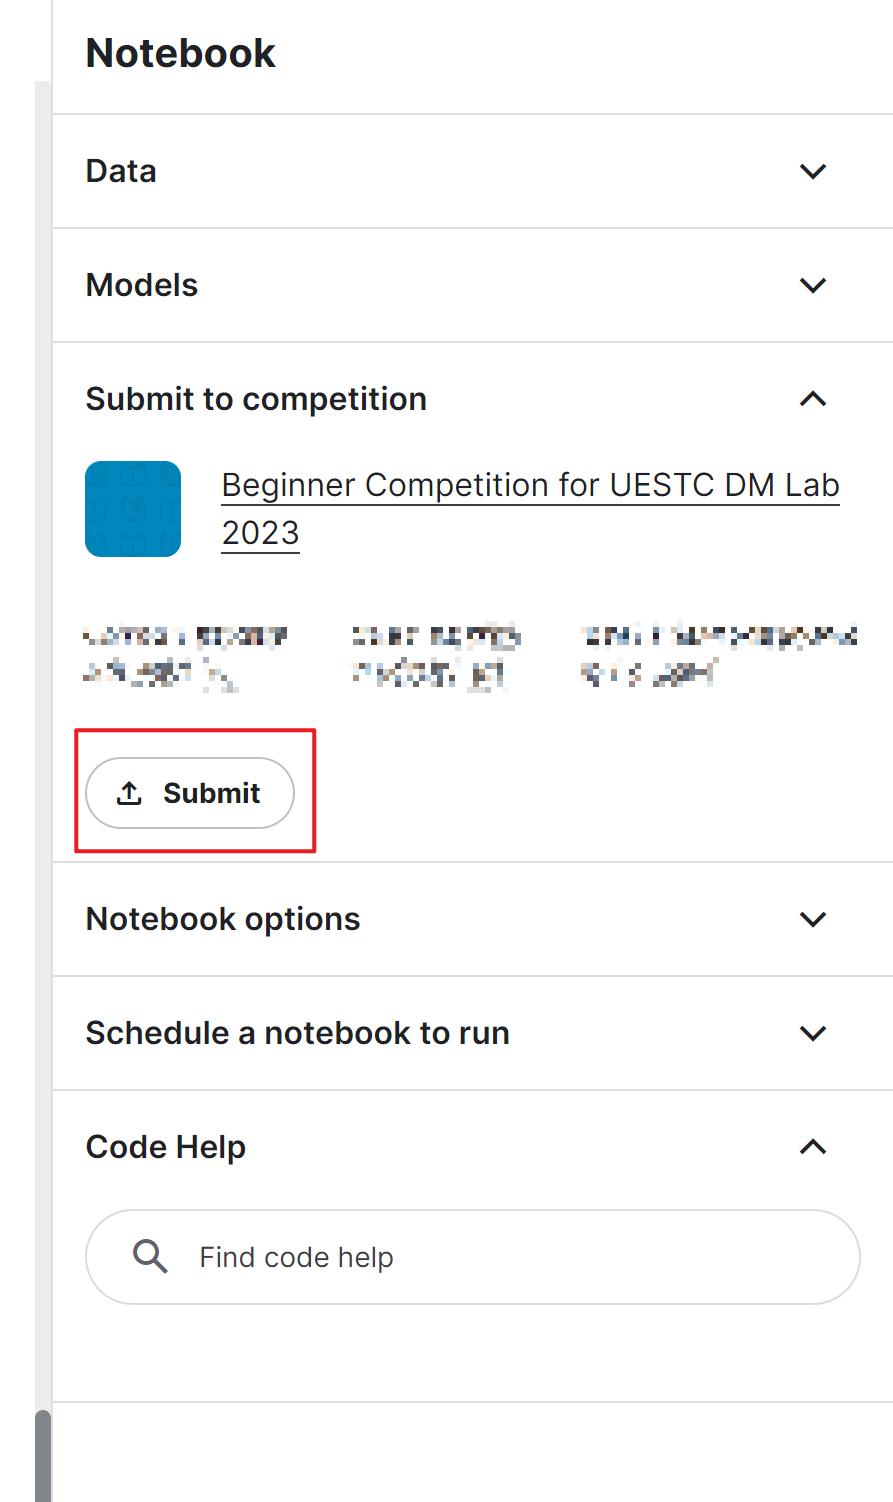